In [1]:
#import openl3
import os
import numpy as np
import tensorflow
import bokeh
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

In [2]:
def get_embeddings(files):
   
    result = []
    Data = np.load(files,mmap_mode='r')
    audio_features = Data["embedding"]
    avg_features = audio_features.mean(axis=0) # average of 96 time frame
   
    return avg_features

In [3]:
data = []

flag = 0
flag_array = []

for folder in sorted(os.listdir('/home/mesl/koh_research/aaai/tensorflow-wavenet/ravdess_speech_mfcc/')):
    flag = flag+1
    flag_array = np.full((1939,), flag) # (512,) #(1939,)
    path = '/home/mesl/koh_research/aaai/tensorflow-wavenet/ravdess_speech_mfcc/'+folder+'/'

    print (flag, folder)
    print("==============")
#     print (path)

    for npz in sorted(os.listdir(path)):
                       
        if '.npy' in npz:
            npzpath = path + npz
            
            fileName, fileExtension = os.path.splitext(npz)
            Data = np.load(npzpath, mmap_mode='r')
            mfcc_features = abs(Data)

            data.append((flag_array, mfcc_features))

1 01neutral
2 02calm
3 03happy
4 04sad
5 05angry
6 06fearful
7 07disgust
8 08surprised


In [4]:
df = pd.DataFrame(data, columns=['Folder', 'Embed'])
print (df)

                                                 Folder  \
0     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
4     [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
...                                                 ...   
1435  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
1436  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
1437  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
1438  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   
1439  [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...   

                                                  Embed  
0     [42.86547, 42.86547, 42.86547, 42.86547, 42.86...  
1     [41.4212, 41.4212, 41.4212, 41.4212, 41.4212, ...  
2     [38.73558, 38.73558, 38.73558, 38.73558, 38.73...  
3     [43.377037, 43.377037, 43.377037, 43.377037, 4...  
4

In [5]:
df

,Folder,Embed
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[42.86547, 42.86547, 42.86547, 42.86547, 42.86..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[41.4212, 41.4212, 41.4212, 41.4212, 41.4212, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[38.73558, 38.73558, 38.73558, 38.73558, 38.73..."
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[43.377037, 43.377037, 43.377037, 43.377037, 4..."
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[38.29561, 34.924732, 33.74073, 35.509327, 35...."
...,...,...
1435,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[40.006683, 40.006683, 40.006683, 40.006683, 4..."
1436,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[35.0588, 35.0588, 35.0588, 34.826202, 35.0444..."
1437,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[36.60278, 36.60278, 36.60278, 36.60278, 36.05..."
1438,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[34.652763, 34.652763, 34.652763, 34.460884, 3..."


In [6]:
df["Embed"][1000].shape

(130,)

In [8]:
temp = np.zeros((1440,120))
for i in range(1440):
    temp[i] = df['Embed'].values[i][:120,].reshape(120,)

In [9]:
temp.shape

(1440, 120)

In [10]:
temp_valid = np.zeros((1440,120)) 
for i in range(1440):
    temp_valid[i] = df['Folder'].values[i][:120,].reshape(120,)

In [11]:
temp_valid.shape

(1440, 120)

In [13]:
temp

array([[42.86547089, 42.86547089, 42.86547089, ..., 38.45862198,
        39.657341  , 40.0605011 ],
       [41.4211998 , 41.4211998 , 41.4211998 , ..., 32.38183594,
        35.11846542, 33.10541153],
       [38.73558044, 38.73558044, 38.73558044, ..., 33.04209518,
        33.62940598, 32.22404099],
       ...,
       [36.60277939, 36.60277939, 36.60277939, ..., 31.47713661,
        31.86138535, 31.87475586],
       [34.65276337, 34.65276337, 34.65276337, ..., 33.89134598,
        33.44944   , 32.6958046 ],
       [35.92728424, 35.92728424, 35.92728424, ..., 14.74585152,
        15.98588753, 18.49771881]])

In [14]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(temp)

In [15]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1]
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.60824983 0.10714481 0.07392622]


In [16]:
rndperm = np.random.permutation(df.shape[0])
print (len(rndperm))

1440


In [17]:
df

,Folder,Embed,pca-one,pca-two,pca-three
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[42.86547, 42.86547, 42.86547, 42.86547, 42.86...",32.595819,32.628853,-41.430660
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[41.4212, 41.4212, 41.4212, 41.4212, 41.4212, ...",39.143872,22.885418,12.798385
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[38.73558, 38.73558, 38.73558, 38.73558, 38.73...",19.104106,16.188012,5.676959
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[43.377037, 43.377037, 43.377037, 43.377037, 4...",69.263222,18.110512,-27.957856
4,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[38.29561, 34.924732, 33.74073, 35.509327, 35....",-0.285563,11.618317,10.895118
...,...,...,...,...,...
1435,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[40.006683, 40.006683, 40.006683, 40.006683, 4...",61.236765,-11.916109,10.624061
1436,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[35.0588, 35.0588, 35.0588, 34.826202, 35.0444...",-32.069716,11.112445,-10.783220
1437,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[36.60278, 36.60278, 36.60278, 36.60278, 36.05...",19.632745,-19.477012,-1.257610
1438,"[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, ...","[34.652763, 34.652763, 34.652763, 34.460884, 3...",3.434780,-8.248030,-23.273155


In [18]:
df['Folder'].values[0].shape

(1939,)

In [19]:
df['Folder'].values.shape

(1440,)

In [20]:
temp2 = np.zeros(1440)
for i in range(1440):
    temp2[i] = df['Folder'].values[i][0]

In [21]:
temp2

array([1., 1., 1., ..., 8., 8., 8.])

In [22]:
df['y'] = temp2

In [23]:
def f(x):
    return np.int(x)

No handles with labels found to put in legend.


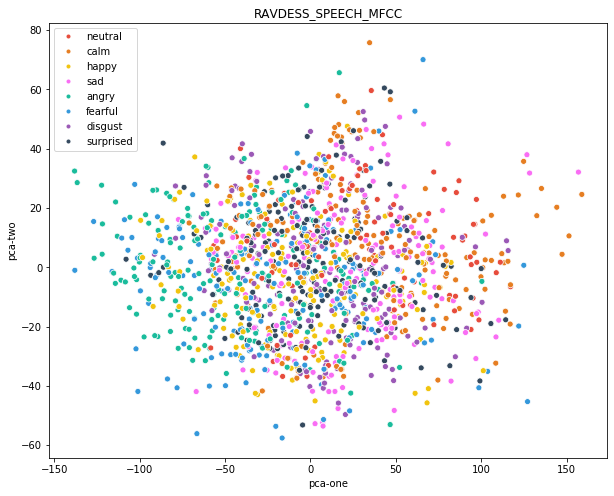

In [24]:
from matplotlib.lines import Line2D

plt.figure(figsize=(10,8))

flatui = ["#E74C3C", "#E67E22", "#F1C40F", "#f96df4",
           "#1ABC9C", "#3498DB", "#9B59B6", "#34495e"]#,
#           ["#18fa05", "#8F4B2D", "#fba3bf", "#95a5a6"]


sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette(flatui), #muted #hls #Set1
    data=df.loc[rndperm,:],
    legend=False,
    alpha=1
)

custom = [Line2D([], [], marker='.', color="#E74C3C", linestyle='None'),
          Line2D([], [], marker='.', color="#E67E22", linestyle='None'),
          Line2D([], [], marker='.', color="#F1C40F", linestyle='None'),
          Line2D([], [], marker='.', color="#f96df4", linestyle='None'),
          Line2D([], [], marker='.', color="#1ABC9C", linestyle='None'),
          Line2D([], [], marker='.', color="#3498DB", linestyle='None'),
          Line2D([], [], marker='.', color="#9B59B6", linestyle='None'),
          Line2D([], [], marker='.', color="#34495e", linestyle='None')
# custom =    [Line2D([], [], marker='.', color="#18fa05", linestyle='None'),
#           Line2D([], [], marker='.', color="#8F4B2D", linestyle='None'),
#           Line2D([], [], marker='.', color="#fba3bf", linestyle='None'),
#           Line2D([], [], marker='.', color="#95a5a6", linestyle='None')
         ]

# fig = plt.figure(figsize=(8,5))
plt.legend(loc='upper left')
# plt.legend(custom, ['angry','bored','happy','peace'], loc='upper left')
# plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful'], loc='upper left')
plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful','disgust','surprised'], loc='upper left')


# for line in range(0,1440):
#      p1.text(df["pca-one"][line]+0.01, df["pca-two"][line], 
#      f(df["singer"][line]), horizontalalignment='left', 
#      size='small', color='black', weight='semibold')

plt.title('RAVDESS_SPEECH_MFCC') #PCA_RAVDESS_SPEECH_MFCC #EMOTION_VGG



plt.show()

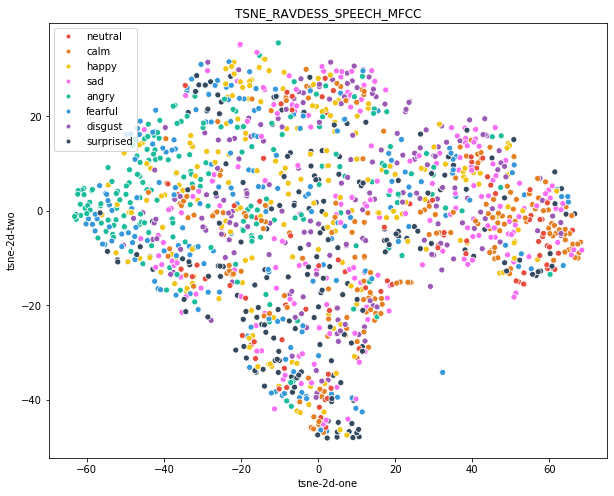

In [25]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0,
            n_iter=1000, n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean',
            init='random', verbose=0, random_state=None, method='barnes_hut', angle=0.5)



tsne_results = tsne.fit_transform(temp)

# print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


# In[54]:


df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]


flatui = ["#E74C3C", "#E67E22", "#F1C40F", "#f96df4",
           "#1ABC9C", "#3498DB", "#9B59B6", "#34495e"]#,
#           "#18fa05", "#8F4B2D", "#fba3bf", "#95a5a6"]


plt.figure(figsize=(10,8))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sns.color_palette(flatui),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=1
)

custom = [Line2D([], [], marker='.', color="#E74C3C", linestyle='None'),
         Line2D([], [], marker='.', color="#E67E22", linestyle='None'),
         Line2D([], [], marker='.', color="#F1C40F", linestyle='None'),
         Line2D([], [], marker='.', color="#f96df4", linestyle='None'),
         Line2D([], [], marker='.', color="#1ABC9C", linestyle='None'),
          Line2D([], [], marker='.', color="#3498DB", linestyle='None'),
          Line2D([], [], marker='.', color="#9B59B6", linestyle='None'),
          Line2D([], [], marker='.', color="#34495e", linestyle='None')
# custom = [ Line2D([], [], marker='.', color="#18fa05", linestyle='None'),
#            Line2D([], [], marker='.', color="#8F4B2D", linestyle='None'),
#            Line2D([], [], marker='.', color="#fba3bf", linestyle='None'),
#            Line2D([], [], marker='.', color="#95a5a6", linestyle='None')
         ]

# fig = plt.figure(figsize=(8,5))
plt.legend(loc='upper left')
# plt.legend(custom, ['angry','bored','happy','peace'], loc='upper left')
# plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful'], loc='upper left')
plt.legend(custom, ['neutral','calm','happy','sad','angry','fearful','disgust','surprised'], loc='upper left')


# for line in range(0,1440):
#      p1.text(df["tsne-2d-one"][line]+0.01, df["tsne-2d-two"][line], 
#      f(df["singer"][line]), horizontalalignment='left', 
#      size='small', color='black', weight='semibold')

plt.title('TSNE_RAVDESS_SPEECH_MFCC') #TSNE_RAVDESS_SPEECH_MFCC #TSNE_EMOTION_VGG



plt.show()

In [26]:
# coding= UTF-8
import numpy as np
import sklearn
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

In [27]:
# Split into train and test sets (400 Audios total)
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.4, random_state=0)

# Data scaling (NOT IMPLEMENTING)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled = scaler.transform(X_test.astype(np.float32))

# Implement simple linear SVM
svm_clf = SVC(C=28.0, gamma = 0.00001, decision_function_shape="ovr") #These parameters can be modified

# Fit model
svm_clf.fit(X_train, y_train) #From Beif github
#svm_clf.fit(X_train_scaled, y_train) # HandsOn book

# Make predictions
#y_pred = svm_clf.predict(X_train_scaled)
y_predict = svm_clf.predict(X_test)

#print('Prediction')
#print(y_predict)
#print
#print("Actual")
#print(y_test)

# Accuracy
acc = svm_clf.score(X_test, y_test)
print
print("accuracy=%0.3f" %acc)

accuracy=0.299


In [38]:
# coding= UTF-8
import numpy as np
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [40]:


# Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size = 0.4, random_state = 233)

# Neural Network Construction
model = Sequential()

# Architecture
model.add(Conv1D(64, 3, activation='relu', input_shape = (150, 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Which is the best loss function for binary (multiple) classification
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Convert label to onehot
y_train = keras.utils.to_categorical(y_train - 1, num_classes=10) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes=10)

X_train = np.expand_dims(X_train, axis=2) # Make 2-dim into 3-dim array to fit model
X_test = np.expand_dims(X_test, axis=2)

# Train Network
model.fit(X_train, y_train, batch_size=64, epochs=100)

# Compute accuracy with test data
score, acc = model.evaluate(X_test, y_test, batch_size=16) # Computes the loss & accuracy based on the input you pass it

print('Test score:', score) #loss
print('Test accuracy:', acc)


Epoch 1/100
607/607 [==============================] - 1s 1ms/step - loss: 2.3416 - accuracy: 0.1812
Epoch 2/100
607/607 [==============================] - 0s 564us/step - loss: 1.9973 - accuracy: 0.1499
Epoch 3/100
607/607 [==============================] - 0s 558us/step - loss: 1.9019 - accuracy: 0.1664
Epoch 4/100
607/607 [==============================] - 0s 527us/step - loss: 1.8928 - accuracy: 0.1960
Epoch 5/100
607/607 [==============================] - 0s 547us/step - loss: 1.8585 - accuracy: 0.2026
Epoch 6/100
607/607 [==============================] - 0s 589us/step - loss: 1.8994 - accuracy: 0.1829
Epoch 7/100
607/607 [==============================] - 0s 546us/step - loss: 1.8993 - accuracy: 0.1829
Epoch 8/100
607/607 [==============================] - 0s 532us/step - loss: 1.8305 - accuracy: 0.2158
Epoch 9/100
607/607 [==============================] - 0s 551us/step - loss: 1.8282 - accuracy: 0.2323
Epoch 10/100
607/607 [==============================] - 0s 592us/step - lo

In [41]:

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(607, 150, 1)
(405, 150, 1)
(607, 10)
(405, 10)


In [42]:
# coding= UTF-8
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

In [44]:


X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.4, random_state=0)

# Build the Neural Network
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=150)) ## Dense method for MLP
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Convert label to onehot
y_train = keras.utils.to_categorical(y_train-1, num_classes=10) # Convert class vector into binary Matrix
y_test = keras.utils.to_categorical(y_test-1, num_classes=10)

# Train and test
model.fit(X_train, y_train, epochs=100, batch_size=64) # Epochs are tunable
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/100
607/607 [==============================] - 0s 303us/step - loss: 25.2193 - accuracy: 0.1977
Epoch 2/100
607/607 [==============================] - 0s 80us/step - loss: 4.4791 - accuracy: 0.1829
Epoch 3/100
607/607 [==============================] - 0s 79us/step - loss: 2.3883 - accuracy: 0.1944
Epoch 4/100
607/607 [==============================] - 0s 81us/step - loss: 2.0830 - accuracy: 0.1944
Epoch 5/100
607/607 [==============================] - 0s 81us/step - loss: 2.0145 - accuracy: 0.2257
Epoch 6/100
607/607 [==============================] - 0s 80us/step - loss: 2.0181 - accuracy: 0.2389
Epoch 7/100
607/607 [==============================] - 0s 81us/step - loss: 2.1495 - accuracy: 0.2125
Epoch 8/100
607/607 [==============================] - 0s 79us/step - loss: 2.0280 - accuracy: 0.1944
Epoch 9/100
607/607 [==============================] - 0s 83us/step - loss: 2.0533 - accuracy: 0.1993
Epoch 10/100
607/607 [==============================] - 0s 104us/step - loss: 1.

In [45]:
# coding= UTF-8
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pandas as pd 

In [46]:


#Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.33, random_state=42)

# Initialize classifier
gnb_clf= GaussianNB() #check input params

# Train model
gnb_clf.fit(X_train, y_train)
#model = gnb_clf.fit(X_train, y_train)

# Make predictions
prediction = gnb_clf.predict(X_test)

#print('Predicted values')
#print(prediction)
#print
#print('Actual values')
#print(y_test)
#print

# Evaluate accuracy
#Similar ways to do it
#print(accuracy_score(y_test,prediction)) 
print
acc = gnb_clf.score(X_test, y_test) 
print("Accuracy = %0.3f" %acc)

Accuracy = 0.326


In [47]:
# coding= UTF-8
from sklearn.ensemble import RandomForestClassifier #Random Forest classifier
import pandas as pd 
import numpy as np
np.random.seed(0)

In [48]:
# #Load data 
# X = np.load('feat.npy') 
# y = np.load('label.npy').ravel() 

#Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size=0.30, random_state=42)

# Initialize classifier
rf_clf = RandomForestClassifier(n_jobs=2, random_state=0) #Check params

# Train model
rf_clf.fit(X_train, y_train)

# Make predictions
y_prediction = rf_clf.predict(X_test)

#print('Predicted values')
#print(y_prediction)
#print
#print('Actual values')
#print(y_test)
#print

# Evaluate accuracy
print
acc = rf_clf.score(X_test, y_test) 
print("Accuracy = %0.3f" %acc)

/home/mesl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy = 0.345


In [49]:
# View the predicted probabilities of the first n observations
rf_clf.predict_proba(X_test)[0:10]

array([[0. , 0.6, 0. , 0.2, 0. , 0.2],
       [0.3, 0.1, 0.2, 0.1, 0.1, 0.2],
       [0.1, 0. , 0.1, 0.4, 0.3, 0.1],
       [0. , 0.4, 0.2, 0.2, 0.1, 0.1],
       [0.2, 0.1, 0.2, 0.2, 0.1, 0.2],
       [0.2, 0.1, 0.1, 0.2, 0.2, 0.2],
       [0. , 0. , 0.1, 0.1, 0.4, 0.4],
       [0.1, 0.2, 0.3, 0.4, 0. , 0. ],
       [0.2, 0.2, 0. , 0.4, 0. , 0.2],
       [0.3, 0.2, 0.2, 0.2, 0.1, 0. ]])

In [171]:
# For future label de-encoding
label_classes = np.array(['Angry','Bored','Happy','Peace'])
print(label_classes)

['Angry' 'Bored' 'Happy' 'Peace']


In [172]:
# Dencoding predicted and actual classes (numeric to written)
prediction_decoded = label_classes[y_prediction]
actual_value_decoded = label_classes[y_test]
#print(y_prediction)
#print(y_test)
print('Prediction decoded')
print(prediction_decoded)
print
print('Actual class decoded')
print(actual_value_decoded)

IndexError: arrays used as indices must be of integer (or boolean) type

In [29]:
# coding= UTF-8
import os
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [30]:


# Split data
X_train, X_test, y_train, y_test = train_test_split(temp, temp2, test_size = 0.25, random_state = 233)

#batch_size = 35
# nb_epochs = 400

# Reshape data for LSTM (Samples, Timesteps, Features)
X_train = np.expand_dims(X_train, axis=2) #(280,193,1)
X_test = np.expand_dims(X_test, axis=2)

y_train = keras.utils.to_categorical(y_train - 1, num_classes=10) # Converts a class vector (integers) to binary class matrix
y_test = keras.utils.to_categorical(y_test - 1, num_classes=10)

# Build RNN Neural Network
print('Build LSTM RNN model ...')
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=X_train.shape[1:]))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(y_train.shape[1], activation='softmax'))
#model.add(Dense(10, activation='sigmoid'))

#model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
#model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
#model.add(Dense(units=genre_features.train_Y.shape[1], activation='softmax'))
          
print("Compiling ...")
model.compile(loss='categorical_crossentropy', # for multiple classes
              optimizer='adam', 
              metrics=['accuracy'])

print(model.summary())

print("Training ...")
model.fit(X_train, y_train, batch_size=35, epochs=100)

print("\nValidating ...")
score, accuracy = model.evaluate(X_test, y_test, batch_size=35, verbose=1)
print("Loss:  ", score)
print("Accuracy:  ", accuracy)

Build LSTM RNN model ...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Compiling ...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 120, 128)          66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 87,498
Trainable params: 87,498
Non-trainable params: 0
_________________________________________________________________
None
Training ...

Epoch 1/100
1080/1080 [==============================] - 8s 8ms/step - loss: 2.1185 - accuracy: 0.1685
Epoch 2/100
1080/1080 [==============================] - 7s 7ms/step - loss: 2.0198 - accuracy: 0.2028
Epoch 3/100
1080/1080 [============

1080/1080 [==============================] - 6s 5ms/step - loss: 1.4241 - accuracy: 0.4667
Epoch 67/100
1080/1080 [==============================] - 6s 5ms/step - loss: 1.4969 - accuracy: 0.4222
Epoch 68/100
1080/1080 [==============================] - 6s 5ms/step - loss: 1.4560 - accuracy: 0.4574
Epoch 69/100
1080/1080 [==============================] - 6s 5ms/step - loss: 1.4121 - accuracy: 0.4722
Epoch 70/100
1080/1080 [==============================] - 6s 5ms/step - loss: 1.4177 - accuracy: 0.4657
Epoch 71/100
1080/1080 [==============================] - 6s 5ms/step - loss: 1.3989 - accuracy: 0.4731
Epoch 72/100
1080/1080 [==============================] - 6s 5ms/step - loss: 1.3796 - accuracy: 0.4796
Epoch 73/100
1080/1080 [==============================] - 6s 5ms/step - loss: 1.3814 - accuracy: 0.4796
Epoch 74/100
1080/1080 [==============================] - 6s 5ms/step - loss: 1.3641 - accuracy: 0.4806
Epoch 75/100
1080/1080 [==============================] - 6s 5ms/step - loss:

In [31]:
import pandas as pd

df = pd.DataFrame({'SVM': [29.9],
                   'CNN': [37.],
                   'MLP':[65.77],
                   'NB': [61],
                   'RF': [66.1],
                   'RNN': [34.72],})
df

,SVM,CNN,MLP,NB,RF,RNN
0,29.9,37.0,65.77,61,66.1,34.72
